<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>
<center><font size=8>E-news Express Project</center></font>

<br><br>



## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.



## Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

    1. Do the users spend more time on the new landing page than on the existing landing page?
    2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    3. Does the converted status depend on the preferred language?
    4. Is the time spent on the new page the same for the different language users?


## Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

    1. user_id - Unique user ID of the person visiting the website
    2. group - Whether the user belongs to the first group (control) or the second group (treatment)
    3. landing_page - Whether the landing page is new or old
    4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
    5. converted - Whether the user gets converted to a subscriber of the news portal or not
    6. language_preferred - Language chosen by the user to view the landing page


### Import the required packages

In [1]:
import numpy as np #library used for working with arrays
import pandas as pd  #library used for data manipulation and analysis 
import matplotlib.pyplot as plt #library for plots and visualisations
import seaborn as sns #library for visualisations
%matplotlib inline  
import scipy.stats as stats  #this library contains a large number of probability distributions and statistical functions

### Understanding the Data

In [3]:
df=pd.read_csv('abtest.csv') # read the dataset
#Print first 5 lines
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape #Outputs the dimemsion of data set

(100, 6)

### Observation
The DataFrame has a total of 100 observations composed of 6 features describing each observation. 

In [5]:
df.isnull().sum() #Check if the there are some missing values in DataFrame

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: 
There are no missing values for any of the 100 observations and their related features.

In [6]:
df.info() #use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
There are a total of 100 entries/observations and 6 columns/features in the dataset. 

There is 3 different data types: 
1. int64(1)
    * user_id
2. float64(1)
    * time_spent_on_the_page
3. object(4)
    * group, landing_page, converted, language_preferred
    
    There are 4 categorical columns and two numeric columns in the dataset.

In [7]:
df.describe(include="all").T #outputs the summary statistics of the dataset 
## Include all helps to get some insight of categorial variable as well

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
1. The average "time spent on the page" is about 5.38 minutes
2. The standard deviation is about 2.38 minutes
3 Inter-quartile range includes:
    * Min = 0.19
    * 25% quartile = 3.88
    * 50% quartile = 5.42
    * 75% quartile = 7.02
    * Max = 10.71
    
4. The feature "group" has 2 unique values and top value is "control"
5. The feature "landing page" also has 2 unique values and top value if "old"
6. The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54.
7. he feature "language preferred" has 3 unique values with spanish being top .

In [8]:
df['language_preferred'].unique() #Output unique language


array(['Spanish', 'English', 'French'], dtype=object)

In [9]:
df['language_preferred'].value_counts() #get the count of each unique value

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

#### Observations: 
The feature "language preferred" has 3 unique values spanish, english, and french, with both french and spanish having the highest frequencies of 34. 

### Exploratory Data Analysis (EDA)
### Univariate Analysis 

### Obervation on landing_page

<Axes: xlabel='landing_page', ylabel='count'>

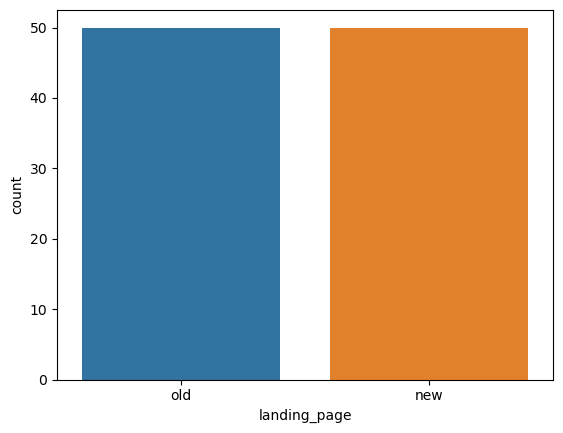

In [10]:
sns.countplot(data=df,x=df['landing_page'],hue=df['landing_page'])

### Observatiion
The data shows 50 observations for the old landing page and 50 observation for the new landing page.

### Observations on "time spent on the landing page"

<Axes: xlabel='time_spent_on_the_page', ylabel='Count'>

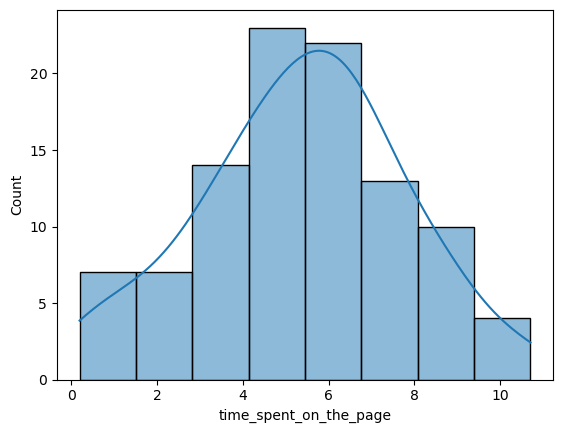

In [11]:
sns.histplot(data=df,x=df['time_spent_on_the_page'],kde=True)

<Axes: xlabel='time_spent_on_the_page'>

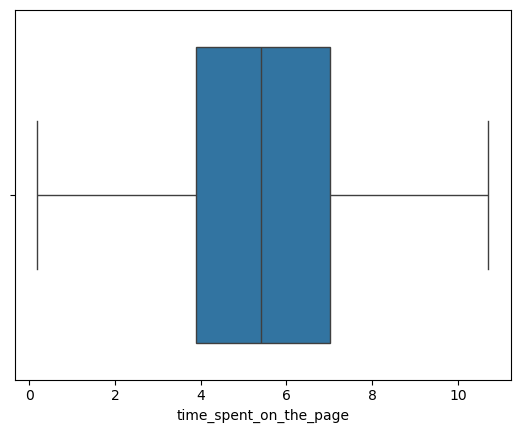

In [12]:
sns.boxplot(data=df,x=df['time_spent_on_the_page'])

#### Observations:
1. The average "time spent on the page" is about 5.38 minutes
2. The standard deviation is about 2.38 minutes
3. Inter-quartile range includes:
    * Min = 0.19
    * 25% quartile = 3.88
    * 50% quartile = 5.42
    * 75% quartile = 7.02
    * Max = 10.71
4. The data seems to follow a normal distribution as seen on the barplot/histogram

### Observations on "converted"

In [13]:
df['converted'].describe()  #outputs the count, unique values, top value, frequency, and data type

count     100
unique      2
top       yes
freq       54
Name: converted, dtype: object

In [14]:
df['converted'].unique()

array(['no', 'yes'], dtype=object)

#### Observations: 
The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54 and no(converted) with 46.

<Axes: xlabel='converted', ylabel='count'>

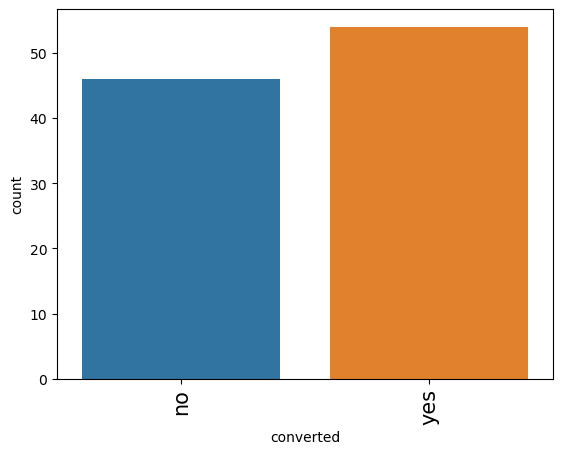

In [15]:
plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df,x=df['converted'],hue=df['converted'])

#### Observations: 
The feature "converted" has 2 unique values no and yes, with yes(coverted) having the highest frequency of 54 and no(converted) with 46.

### Observations on "language_preferred"

<Axes: xlabel='language_preferred', ylabel='count'>

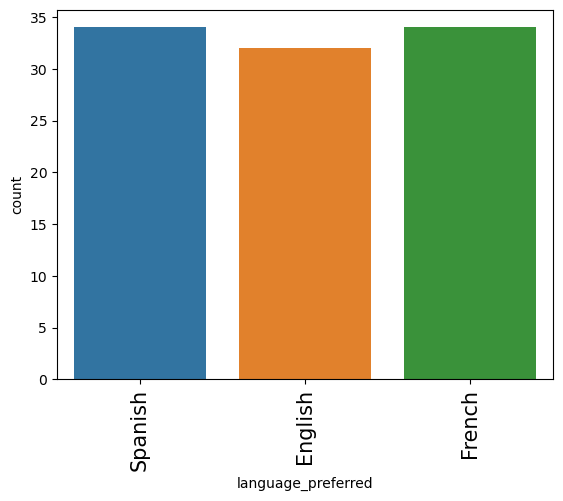

In [16]:
plt.xticks(rotation=90, fontsize=15)
sns.countplot(data=df,x=df['language_preferred'],hue=df['language_preferred'])

In [17]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

#### Observations: 
The feature "language preferred" has 3 unique values spanish, english, and french, with both french and spanish having the highest frequencies of 34. 

### Observations on "group"

In [18]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

<Axes: xlabel='group', ylabel='count'>

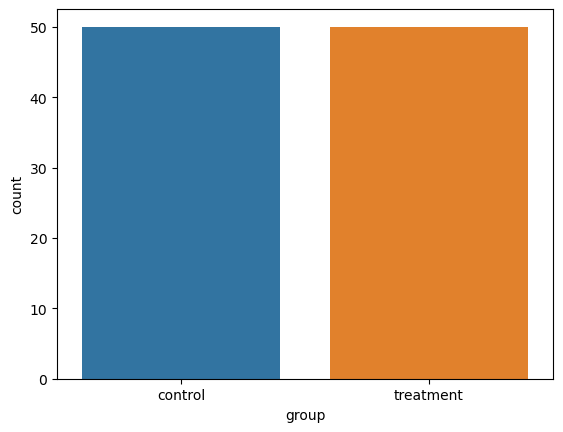

In [19]:
sns.countplot(data=df,x=df['group'],hue=df['group'])

### Observation 
There are two group control and treatment and both are having 50,50 observation

### Bivariate Analysis

In [20]:
df.corr(numeric_only=True)

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


<Axes: xlabel='group', ylabel='time_spent_on_the_page'>

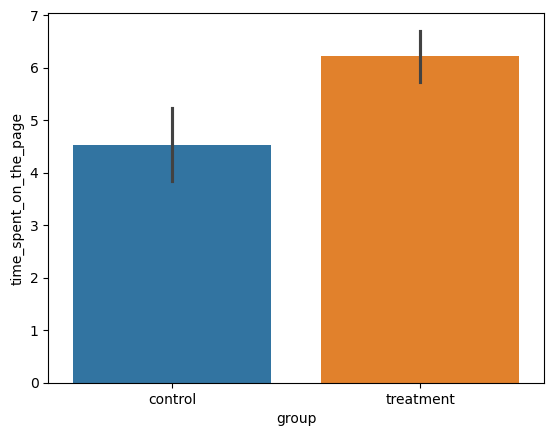

In [21]:
sns.barplot(data=df,x=df['group'],y=df['time_spent_on_the_page'],hue=df['group'])

In [22]:
df.groupby(df['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

#### Observations:
The treatment group(those exposed to the new landing page) are more likely to spend more time on the page.

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

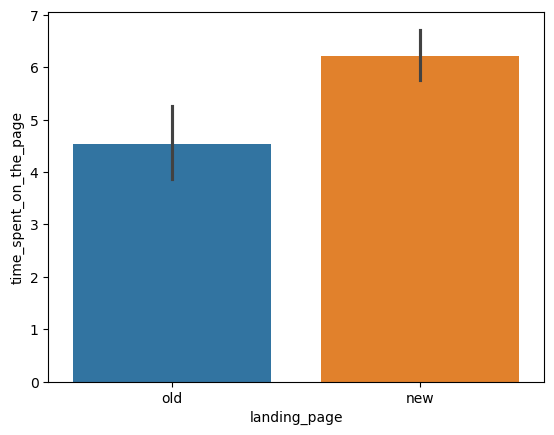

In [23]:
sns.barplot(data=df,x=df['landing_page'],y=df['time_spent_on_the_page'],hue=df['landing_page'])

In [24]:
df.groupby(df['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

#### Observations:
The same observation from above applies to this one too. Users exposed to the new landing page spend more time on average than those on the old landing page.

<Axes: xlabel='converted', ylabel='time_spent_on_the_page'>

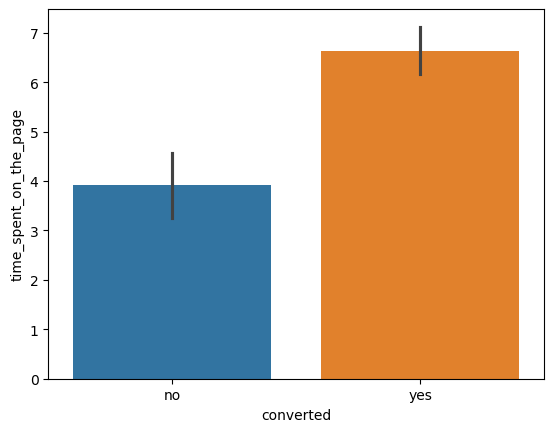

In [25]:
sns.barplot(data=df,x=df['converted'],y=df['time_spent_on_the_page'],hue=df['converted'])

In [26]:
df.groupby(df['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

#### Observations:
Users who converted demonstrate on average a higher time spent on the page.

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

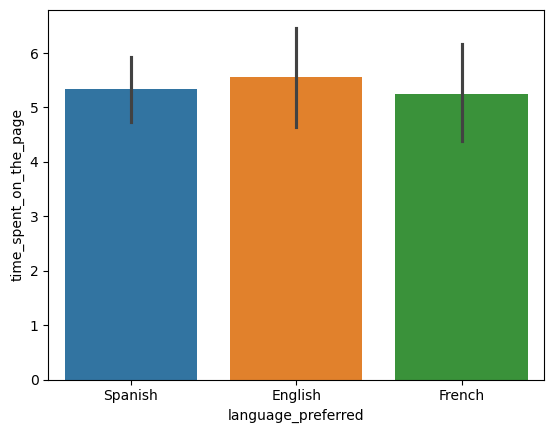

In [27]:
sns.barplot(data=df,x=df['language_preferred'],y=df['time_spent_on_the_page'],hue=df['language_preferred'])

In [28]:
df.groupby(df['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

#### Observations:
Amond the different languages English, French, and Spanish the average time spent on the page seems relatively the same.

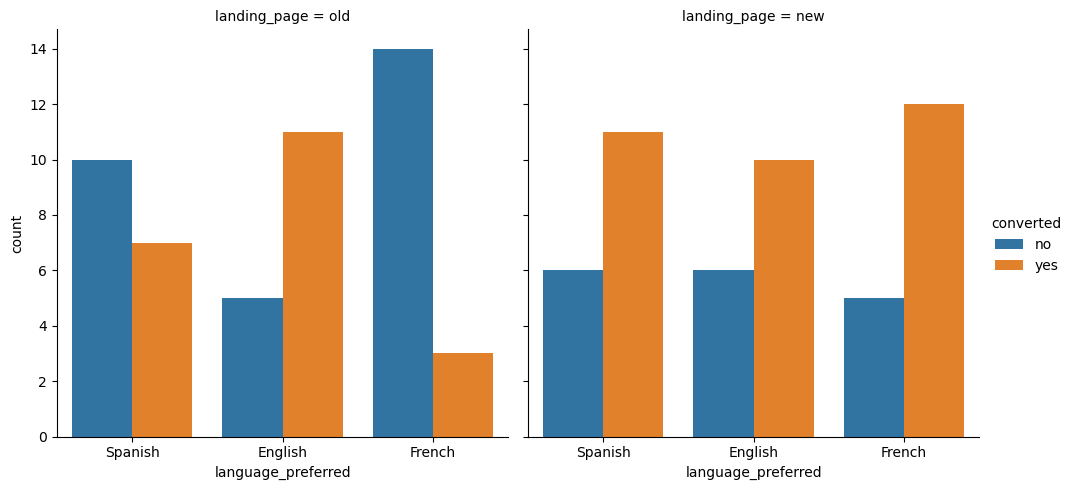

In [29]:
sns.catplot(data=df,x=df['language_preferred'],hue=df['converted'],col=df['landing_page'],kind="count")

#### Observations:
French and Spanish speaking users are less likely to convert to the new landing page if first exposed to the old landing page. Whereas, if they are first exposed to the new landing page they are more likely to convert. 

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

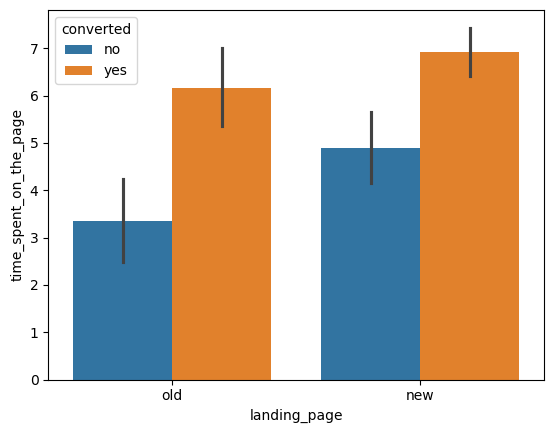

In [30]:
sns.barplot(data=df,x=df['landing_page'],y=df['time_spent_on_the_page'],hue=df['converted'])

#### Observations:
The graph demonstrates that more users are likely to convert to the new landing page despite whatever landing page they are first exposed to and those who do convert demonstrate higher time averages. 

### 1. Do the users spend more time on the new landing page than the old landing page?

<Axes: xlabel='landing_page', ylabel='time_spent_on_the_page'>

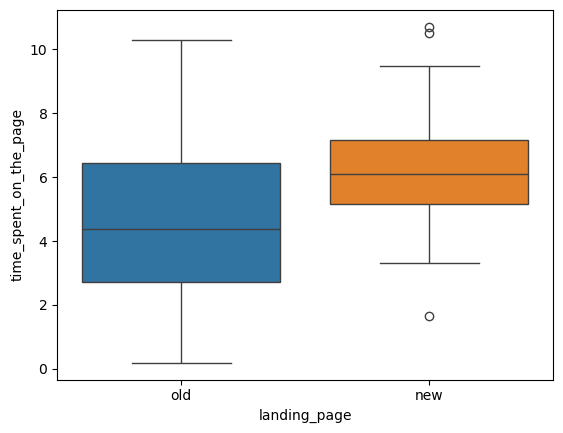

In [31]:
sns.boxplot(data=df,x=df['landing_page'],y=df['time_spent_on_the_page'],hue=df['landing_page'])

In [32]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

#### Observations:
On average users seem to spend more time on the new page than on the old page.

In [33]:
print('The standard deviation time spent for old page is ' + str(round(df[df['landing_page']=='old']['time_spent_on_the_page'].std(), 2)))
print('The standard deviation time spent for new page is ' + str(round(df[df['landing_page']=='new']['time_spent_on_the_page'].std(), 2)))

The standard deviation time spent for old page is 2.58
The standard deviation time spent for new page is 1.82


## Hypothesis testing 
we can do hypothesis testing to see if new and old page spend time is same or more

### Null and Alternate Hypothesis 

Let $\mu_1, \mu_2$ be the mean time spent on the old landing page vs the mean time spent on the new landing page.

hypotheses can be written as:

$H_0: \mu_1 = \mu_2 $

$H_a: \mu_1 < \mu_2 $

This is a case of a one-tailed two-sample mean test. As the two samples are  independent in this case,time spent of page follow normal distribution and  the population standard deviations are unknown, we shall use a two sample t-test with unequal daviation as standard daviation of sample is unequal for this problem 

#### Step 3: Decide the significance level
As given in the problem statement, we select $\alpha$ = 0.05.

In [34]:
test_stat,pvalue=stats.ttest_ind(df[df['landing_page']=='old']['time_spent_on_the_page'],df[df['landing_page']=='new']['time_spent_on_the_page'],equal_var=False,alternative='less')
pvalue

0.0001392381225166549

In [35]:
# print the conclusion based on p-value
if pvalue < 0.05:
    print(f'As the p-value {pvalue} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pvalue} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


####  Draw Inference
At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate among the two groups, old landing page and new landing page are different and  Mean time spent on new landing page is higher than old landing page

### 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

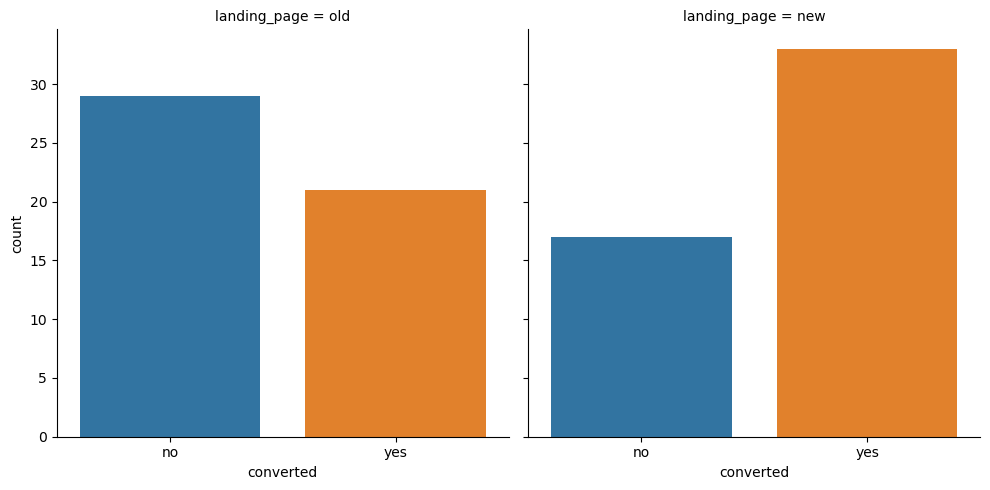

In [36]:
sns.catplot(data = df, x = 'converted', col = 'landing_page', kind = 'count',hue=df['converted'])

#### Observation:
Users engaging with the new landing page are more likely to convert than those using the old landing page.

In [37]:
df.shape

(100, 6)

In [38]:
df.groupby(df['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64

## Hypothesis testing 

### null and alternative hypothesis
Let $p_1,p_2$ be the proportions of converters in old landing page and new landing page respectively.

The company will test the null hypothesis

>$H_0:p_1 \geq p_2$

against the alternate hypothesis

>$H_a:p_1 < p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, converted is either yes or no.
*   Random sampling from the population - Yes, collected sample is a random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

total sample: 50 

Old landing page  converted : 21 

New landing page  converted : 33

$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{40-33}{50} =17 \geq 10 $

In [39]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest
# set the counts of converters
converter_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converter_count, nobs,alternative="smaller")
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


In [40]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


####  Draw Inference

At 5% significance level, we reject the null hypothesis. Hence we have enough statistical evidence to say that the conversion rate of new landing page is greater than old landing page.

### 3. Does the converted status depend on the preferred language? 

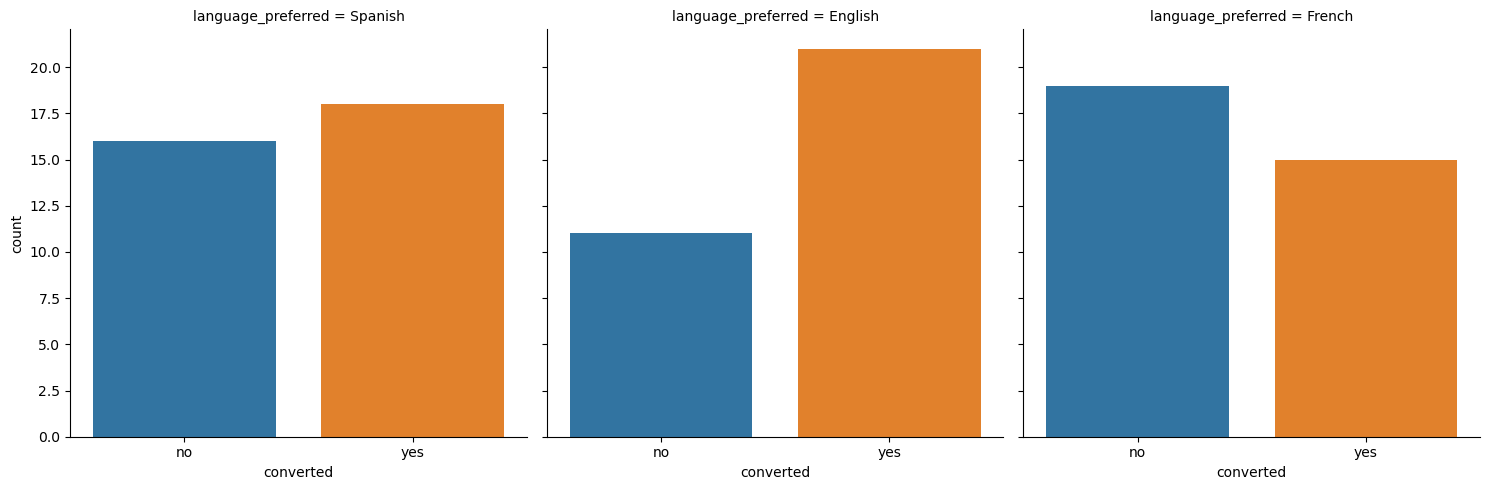

In [41]:
sns.catplot(df,x=df['converted'],col=df['language_preferred'],kind="count",hue=df['converted'])

#### Observation:
The converted status doesn't seem to have much of an effect on French and Spanish speaking users, but does play more of a role with English speaking users.

In [42]:
df1 = pd.crosstab(df['converted'], df['language_preferred'])
df1

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


## Hypothesis testing 

### null and alternative hypothesis


We will test the null hypothesis

 $H_0:$ Converted status is independent of language preferred.

against the alternate hypothesis

 $H_a:$ Converted status depends on language preferred.
 
 
### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, collected sample is a simple random sample. 

We will use the `chi2_contingency` function from the scipy stats library to perform the hypothesis test. It takes the contingency table as an input and returns the test statistic, p-value, degrees of freedom, and the expected frequencies as the output.

In [43]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(df1)
print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370837
p-value = 0.21298887487543447
Degrees of freedom = 2
Expected frequencies 
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]


In [44]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference 
At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that converted status depends on language preferrence.

### 4. Is the mean time spent on the new page same for the different language users?

In [45]:
df1 = df.loc[df['landing_page'] == 'new']
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [46]:
df1.groupby(df1['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

<Axes: xlabel='language_preferred', ylabel='time_spent_on_the_page'>

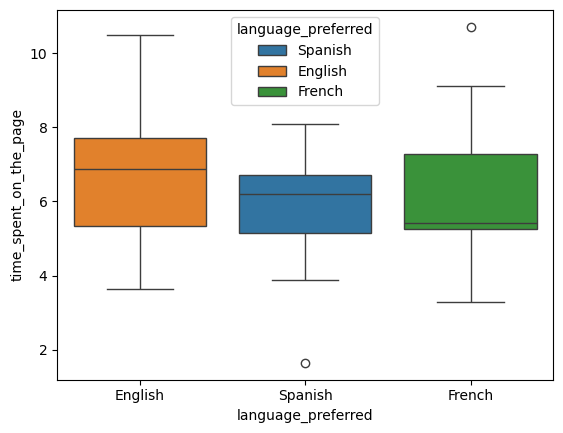

In [47]:
sns.boxplot(data = df1, x = 'language_preferred', y = 'time_spent_on_the_page',hue=df['language_preferred'])

#### Observation:
The average time spent on the pages seems relatively the same among the different language preferences.

## Hypothesis testing 

### null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for language preferences English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one time average of the new landing page is different among the language preferences.


the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time spent on page follows a normal distribution

against the alternative hypothesis

>$H_a:$ time spent does not follow a normal distribution

In [48]:
# find the p-value
w, p_value = stats.shapiro(df1['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is large, we fail to reject the null hypothesis that the time spent on page follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [49]:
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df1['time_spent_on_the_page'][df1['language_preferred']=="English"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="Spanish"], 
                                   df1['time_spent_on_the_page'][df1['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's see whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

In [50]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df1.loc[df1['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df1.loc[df1['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df1.loc[df1['language_preferred'] == 'French', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


In [51]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Draw inference
At 5% significance level, we fail to reject the null hypothesis. Hence we don't have enough statistical evidence to say that at least one time average on the new landing page is different among the language preferences.


This means that the time averages on the new landing page for the different languages are relatively the same.

## Conclusion 

1. Mean time spent on new landing page is higher than old landing page 
2. Conversion rate of new landing page is higher than old landing page.
3. Converted status doesn't depends on language preferrence
3. Time averages on the new landing page for different language are relatively same.

## Business Recommendation

##### 1. The new landing page is effective, as the conversion rate is higher on the new landing page compared to the old landing page.
##### 2. Implement the new landing page for users, since they are spending more time on the new landing page compared to the old one.

##### 2. As the time spent on different languages is relatively the same and the conversion status doesn't depend on language preferences, the company should continue to offer the page in the provided languages.

